# Sub-Functions
Functions that will be used within the primary approximation function

In [1]:
def deriv_matrix(size,order):
    """
    Creates a square matrix that discretizes the derivative of a function.
    The order of derivation is achieved by taking the matrix to the power of it.
    
    Note that the matrix will be int8 by default unless the order is not an integer.
    
    Input:
        The size of the nxn matrix (integer, int8)
        The order of the planned derivative (float, float64)
    
    Output:
        2D Array
    """
    import numpy as np # Array library
    from scipy.linalg import fractional_matrix_power # Function for float power of matrix
    
    ## Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal 1's
    if order%1 == 0: # If the order is an integer, any powers will automatically be integers as well
        matrix = np.zeros((size-1,size-1), dtype = "int64")
    else: # Otherwise, fractional powers will likely create floats
        matrix = np.zeros((size-1,size-1))
    np.fill_diagonal(matrix, int(1))
    
    
    
    ## Add a row below and column to the left, then make the diagonal -1
    if order%1 == 0:
        row = np.zeros((size-1,1), dtype = "int8")
    else:
        row = np.zeros((size-1,1))
    matrix = np.hstack((row, matrix))
    
    if order%1 == 0:
        column = np.zeros((1,size), dtype = "int8")
    else:
        column = np.zeros((1,size))
    matrix = np.vstack((matrix, column))
    
    np.fill_diagonal(matrix, int(-1))
    
    
    ## Apply the order of the planned derivative to the matrix
    # If the power is 1, we can skip everything
    if order != 1:
        if order%1 == 0: # If the power is an integer, we do this command
            matrix = np.linalg.matrix_power(matrix,order)
        else: # Otherwise we use a different command
            matrix = fractional_matrix_power(matrix,order)

    return matrix



def graph(x_val,yn_approx,yn_actual):
    """
    Creates graphs of x-values in relation to both the approximated and actual y-values.
    
    Input:
        x-values (1D Array, float64)
        Approximated y-values (1D Array, float64)
        Actual y-values (1D Array, float64)
    
    Output:
        Graph of the approximated and actual functions overlaid
        Graph of the absolute error (absolute value of approx-actual)
    """
    import matplotlib.pyplot as plt # Import graphing functions
    import numpy as np # Import array modification library
    
    ## Set up two subplots
    plt.figure(figsize=(16,7)) # Set size of plots
    plt.subplots_adjust(wspace = 0.3, hspace = 0.4) # Set spacing between plots
    
    
    
    ## Create first subplot for displaying both graphs
    plt.subplot(1,2,1)
    
    # Set up cosmetic qualities
    plt.title("Approximated vs Actual Outputs")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    
    # Plot data and label it
    plt.plot(x_val,yn_approx, color="red", linestyle="dashed", label="Approximated Values")
    plt.plot(x_val,yn_actual, color="black", label="Actual Values")
    plt.legend()
    
    
    
    ## Create second subplot for showing absolute error
    plt.subplot(1,2,2)
    
    # Set up cosmetic qualities
    plt.title("Absolute Error in Y")
    plt.xlabel("X")
    plt.ylabel("Absolute Error")
    plt.grid()
    
    # Create relative error array
    abs_error = abs(yn_approx - yn_actual)
    
    # Plot values
    plt.plot(x_val,abs_error, color="red")
    
    
    
    ## Show plot
    plt.show()

# Primary Function
Main function that will be used to approximate the derivative of a given function

In [2]:
def deriv_aprox(function, derivative, d_order, x_min, x_max, x_int):
    """
    Approximates the nth order derivative of the pre-defined function f(x) based on inputted x-values.
    
    Input:
        Original function (string)
        Derivative of same function (string)
        Order of the derivative (integer or float)
        Minimum x-value (integer or float)
        Maximum x-value (integer or float)
        Number of x-subintervals (integer)
    
    Output:
        Approximated and actual graph overlayed
        Absolute Error Graph
        Total runtime (seconds)
    """
    import numpy as np # Import array library
    import sympy as sp # Function interpretation library
    
    from sympy.abc import x # Allow x in strings to be interpretted as variable
    from time import time # Time function for giving runtime
    begin = time()
    
    
    
    ## Create pre-defined arrays
    # Create x-values based on min, max, and subintevals
    x_val = np.linspace(x_min, x_max, x_int+1)
    x_dist = (x_max - x_min) / x_int # Specifies distance between all x-values
    
    # Create y-values
    expr = sp.sympify(function) # Convert function string into something computable
    f = sp.lambdify(x, expr, "numpy") # Allow the function to use numpy concepts
    y_val = f(x_val) # Find all function values
    
    # Generate derivative matrix
    D_mat = deriv_matrix(x_int+1, d_order)
    
    
    
    ## Compute nth order derivative
    # Compute APPROXIMATED yn values
    yn_approx = x_dist ** (-d_order) * np.matmul(D_mat, y_val)
    
    # Compute ACTUAL yn values
    expr2 = sp.sympify(derivative) # Convert derivative string into something computable
    fn = sp.lambdify(x, expr2, "numpy") # Allow the function to use numpy concepts
    yn_actual = fn(x_val) # Find all derivative values
    
    
    
    ## Produce graphs & show runtime
    # We cut off the last value since we're ignoring the boundary condition for succinctness
    # Every order of derivative cuts off another value
    graph(x_val[:(-1-d_order)],yn_approx[:(-1-d_order)],yn_actual[:(-1-d_order)])
    print(f"Finished in {round(time()-begin,3)} seconds.")

# Querries
Cell for testing functions

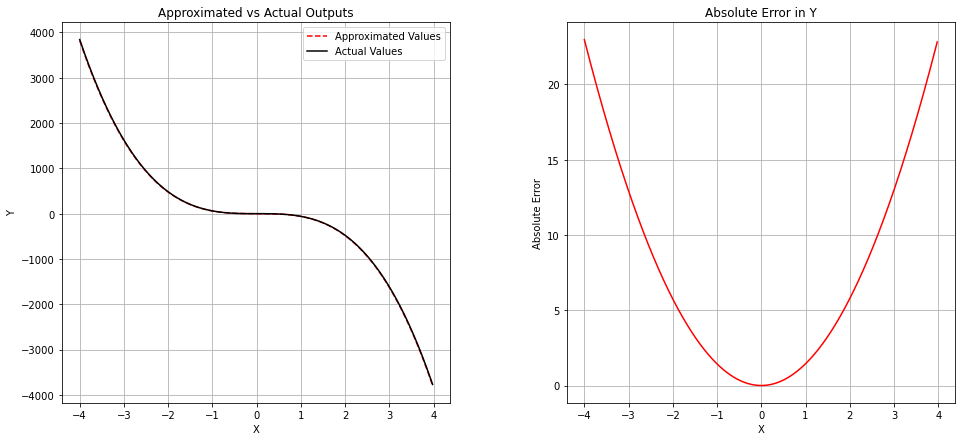

Finished in 1.583 seconds.


In [3]:
## INPUT:
# f(x) as string
# f^{n}(x) as string
# Order of derivative n
# MINIMUM x value
# MAXIMUM x value
# Number of x-intervals
deriv_aprox("cos(x)-3*x^5", "-cos(x)-60*x^3", 2, -4, 4, 1000)